### Multi-Class Image Classification.

we've been through a bunch of following steps with binary class classification , but now we're going to step up with 10 classes of **Food(mutli-class classificatio)**

1.   Become one with data
2.   Preprocessing the data
3.   create a model (start with the base line)
4.   fit the model (overfit it to make sure it works)
5.   Evaluate the model
6.   Adjust different hyperparameters and improve the model(reduce overfitting)
7.   Repeat Until satisfied


In [ ]:
# import data

!wget = https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-06-27 07:47:44--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-06-27 07:47:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   230MB/s    in 2.2s    

2021-06-27 07:47:47 (230 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2021-06-27 07:47:47--
Total wall clock time: 2.4s
Downloaded: 1 files, 495M in 2.2s (230 MB/s)


In [ ]:
import zipfile

zip_file = zipfile.ZipFile('/content/10_food_classes_all_data.zip', 'r')
zip_file.extractall()
zip_file.close()

In [ ]:
import os
for dirpath, dirname, filename in os.walk('/content/10_food_classes_all_data'):
  print(f"there are {len(dirname)} directories and {len(filename)} images in directory '{dirpath}'.")

there are 2 directories and 0 images in directory '/content/10_food_classes_all_data'.
there are 10 directories and 0 images in directory '/content/10_food_classes_all_data/train'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/train/pizza'.
there are 0 directories and 750 images in directory '/content/10_food_classes_all_data/

In [ ]:
# setup train and test dataset
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

# train_data change to train_dir and so on

In [ ]:
len(train_data), len(test_data)

(39, 38)

In [ ]:
# lets gets the class name
import pathlib
import numpy as np

data_dir = pathlib.Path(train_data)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def image_view(target_dir, target_class):

  target_file = target_dir + '/' + target_class

# get random image path
  random_image = random.sample(os.listdir(target_file), 1)

  img = mpimg.imread(target_file + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") 

  return img


Image shape: (512, 512, 3)


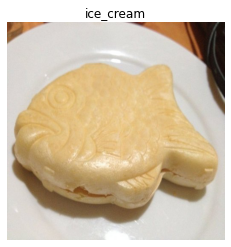

In [ ]:
img = image_view(target_dir = train_data,
                        target_class = random.choice(class_names))

### Data PreProcessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale the data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# load data from directory and turn into batches

train_data = train_datagen.flow_from_directory(train_data,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_data,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model(baseline )

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# create a model 
model_1 = Sequential([
          Conv2D(10, 3, input_shape = (224,224,3)),
          Activation(activation = 'relu'),
          Conv2D(10,3, activation='relu'),
          MaxPool2D(),
          Conv2D(10,3, activation='relu'),
          Conv2D(10,3, activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(10, activation='softmax')

])

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 75s 185ms/step - loss: 2.1312 - accuracy: 0.2140 - val_loss: 1.9718 - val_accuracy: 0.3100
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.8603 - accuracy: 0.3597 - val_loss: 1.8300 - val_accuracy: 0.3644
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.4736 - accuracy: 0.5025 - val_loss: 1.8946 - val_accuracy: 0.3664
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.8450 - accuracy: 0.7281 - val_loss: 2.4529 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 42s 181ms/step - loss: 0.3422 - accuracy: 0.8961 - val_loss: 3.5478 - val_accuracy: 0.2884


### 5.Evaluate the model

In [ ]:
# evaluate on test data
model_1.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.5478 - accuracy: 0.2884


[3.547780752182007, 0.28839999437332153]

In [ ]:
def plot_loss_curves(history):

  """ return separate loss curves for trainning and validation metrics """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epoch = range(len(history.history['loss'])) # how many epochs we run for

  plt.plot(epoch, loss, label = 'trainning_loss')
  plt.plot(epoch, val_loss, label='valadition_loss')
  plt.title('loss')
  plt.xlabel('epoch')
  plt.legend()

  plt.figure()
  plt.plot(epoch, accuracy, label = 'accuracy')
  plt.plot(epoch, val_accuracy, label='valadition_acc')
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.legend()

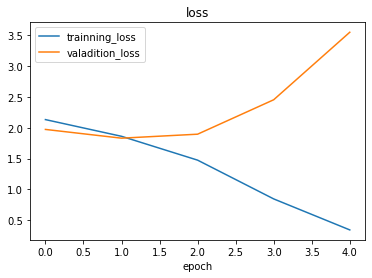

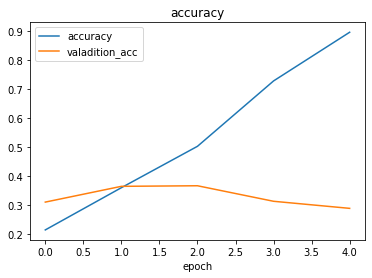

In [ ]:
# check out the model loss curves
plot_loss_curves(history_1)

### What do these loss curves tell us?

its seems our model is **overfitting** the training set quite badly, getting great results on training set but fails to generalise well on validation data(unseen data)

### 6. Adjust the model hyperparameter to reduce the **overfitting**

* **get more data** - having more data gives a opportunity to learn diverse pattern

* **simply the model** - if our current model is overfitting the model, it may be too complicated of a model, one way to simply a model is to reduce the number of layers or reduce numbers of hidden units in layers

* **Use Data Augmentation** - manipulates the taining data in a such a way to add more diversity to it without altering the original data

* **use Trnasfer Learning** - the patterns another model has learned on similar data to your own and allow us to use thos pattern on your own dataset

# simply a model first

* lets try to remove 2 conv2d layers from our model

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
model_2 = Sequential([
          Conv2D(10,3, activation='relu', input_shape = (224,224,3)),
          MaxPool2D(),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(10, activation='softmax')
])

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
history_2 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 188ms/step - loss: 0.1171 - accuracy: 0.9669 - val_loss: 4.9072 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 0.0688 - accuracy: 0.9825 - val_loss: 5.5005 - val_accuracy: 0.2752
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 6.0005 - val_accuracy: 0.2672
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.0327 - accuracy: 0.9921 - val_loss: 6.9529 - val_accuracy: 0.2500
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.0582 - accuracy: 0.9835 - val_loss: 6.4900 - val_accuracy: 0.2496


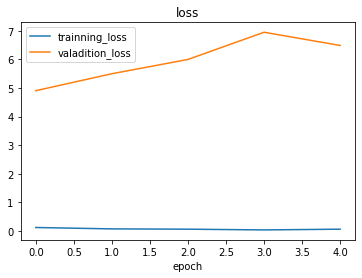

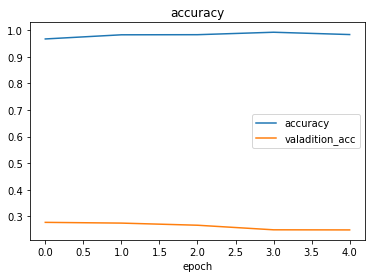

In [ ]:
plot_loss_curves(history_2)

Looks like our simplfying the model experiment didn't work..
accuracy went down and overfitting continued..

try data augmentation

### Try to reduce overfitting with Data Augmentation

Ideally we want to:
* reduce overfitting (get the training and validation loss curves closer)
* Improve Validation accuracy

In [ ]:
# create augmented data
train_data_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip=True,
                                    zoom_range=0.2)
train_data_aug = train_data_aug.flow_from_directory(train_dir,
                                target_size=(224,224),
                                batch_size=32,
                                class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# create another model but this time we use augmented data
model_3 = tf.keras.models.clone_model(model_1) # cloning the model with model1

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
history_3 = model_3.fit(train_data_aug,
                        epochs = 5,
                        steps_per_epoch =len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 103s 437ms/step - loss: 2.1964 - accuracy: 0.1827 - val_loss: 2.0425 - val_accuracy: 0.2600
Epoch 2/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0733 - accuracy: 0.2640 - val_loss: 1.9195 - val_accuracy: 0.3252
Epoch 3/5
235/235 [==============================] - 103s 437ms/step - loss: 1.9972 - accuracy: 0.3020 - val_loss: 1.8331 - val_accuracy: 0.3736
Epoch 4/5
235/235 [==============================] - 103s 436ms/step - loss: 1.9414 - accuracy: 0.3267 - val_loss: 1.8082 - val_accuracy: 0.3744
Epoch 5/5
235/235 [==============================] - 102s 434ms/step - loss: 1.9181 - accuracy: 0.3279 - val_loss: 1.7528 - val_accuracy: 0.4076


In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.7528 - accuracy: 0.4076


[1.7527683973312378, 0.4075999855995178]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 2.3105 - accuracy: 0.0984


[2.3104677200317383, 0.09839999675750732]

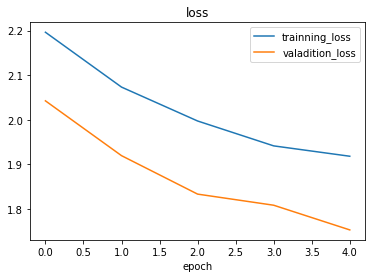

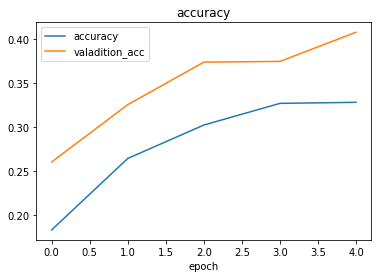

In [ ]:
plot_loss_curves(history_3)

Woah! Thats look much better, the loss curves are much closer to each other than the baseline model, they are heading in the right direction

### Repeat until Satisfied

* restructure our model's architecture(increase layers/hidden unit)
* adjust learning rate
* try different augmentation (adjust hyperparameter in ImageDataGenerator)
* training for longer
* try **Transfer Learning**

## make predictions

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# create a function to import and resize the image
def pre_data(filename, image_size=224):
  
  # read the image
  img = tf.io.read_file(filename)

  # decode the image into tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size = [image_size, image_size])

  # normalized the image
  img = img/255.

  return img

In [ ]:
class_namee = list(class_names)
class_namee

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
def pred_and_plot(model, filename, class_name = class_namee):
  
  img = pre_data(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

# this logic is for multiclass problem
  if len(pred[0]) > 1:
    pred_class = class_name[tf.argmax(pred[0])]
  else:
     pred_class = class_name[int(tf.round(pred))] # for binary class problems


  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

In [ ]:
!wget = https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2021-06-27 09:51:47--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-06-27 09:51:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.1s    

2021-06-27 09:51:48 (34.0 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

FINISHED --2021-06-27 09:51:48--
Total wall clock time: 0.4s
Downloaded: 1 files, 3.4M in 0.1s (34.0 MB/s)


In [ ]:
!wget = https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-06-27 10:03:02--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-06-27 10:03:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2021-06-27 10:03:03 (26.7 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

FINISHED --2021-06-27 10:03:03--
Total wall clock time: 0.3s
Downloaded: 1 files, 1.6M in 0.06s (26.7 MB/s)


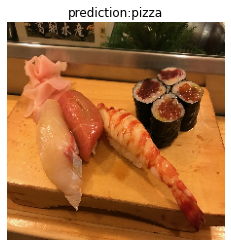

In [ ]:
pred_and_plot(model_3, '/content/03-sushi.jpeg')